In [5965]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [5966]:
data_file = "conso.txt"

In [5967]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [5968]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [5969]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


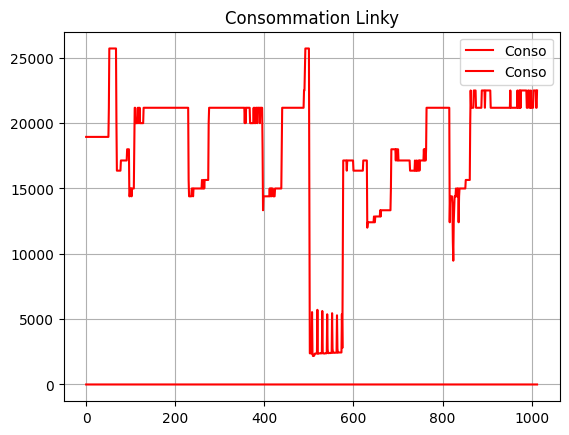

In [5970]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [5971]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [5972]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59827 entries, 0 to 59826
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  59827 non-null  int64  
 1   kWh       59827 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 934.9 KB


In [5973]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
59822,26546,0.14
59823,26436,0.14
59824,25978,0.14
59825,26344,0.14


In [5974]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
59822,26546,0.14,26.546,135.613652,1428954466
59823,26436,0.14,26.436,136.177939,1428980902
59824,25978,0.14,25.978,138.578797,1429006880
59825,26344,0.14,26.344,136.653507,1429033224


In [5975]:
# index dernier echantillon
l=len(conso_data)-1
l

59826

In [5976]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1429059791000

In [5977]:
old

False

In [5978]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 27, 33, 434009)

In [5979]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59827 entries, 0 to 59826
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   59827 non-null  int64         
 1   kWh        59827 non-null  float64       
 2   sec        59827 non-null  float64       
 3   Wh         59827 non-null  float64       
 4   cumul(ms)  59827 non-null  int64         
 5   dates      59827 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.7 MB


In [5980]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:27:59.723009,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:28:25.966009,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:28:51.851009,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:29:17.605009,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:29:43.379009,07/03/2024
...,...,...,...,...,...,...,...
59822,26546,0.14,26.546,135.613652,1428954466,2024-03-23 13:23:27.900009,23/03/2024
59823,26436,0.14,26.436,136.177939,1428980902,2024-03-23 13:23:54.336009,23/03/2024
59824,25978,0.14,25.978,138.578797,1429006880,2024-03-23 13:24:20.314009,23/03/2024
59825,26344,0.14,26.344,136.653507,1429033224,2024-03-23 13:24:46.658009,23/03/2024


In [5981]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:27:59.723009   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec          Wh   cumul(ms)  \
 59826     26567  0.14  26.567  135.506455  1429059791   
 
                            dates        days  
 59826 2024-03-23 13:25:13.225009  23/03/2024  )

In [5982]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'23/03/2024'

In [5983]:
month, year

(3, 2024)

In [5984]:
def conso_by_day(day):
    conso_day = conso_data[conso_data['days']==day]
    conso_jour = len(conso_day)/1000
    return conso_jour



In [5985]:
conso_graph=[]
for d in range(7,now.day+1):
    if d<10:prefd='0'
    else:prefd=''
    if month<10:prefm='0'
    else:prefm=''
    day = f'{prefd}{d}/{prefm}{month}/{year}'
    conso_graph.append((day,conso_by_day(day)))
    #print(day,conso_by_day(day))
conso_df = pd.DataFrame(conso_graph, columns=('day','conso'))
conso_df.set_index('day',inplace=True)
conso_df

,conso
day,
07/03/2024,3.332
08/03/2024,3.762
09/03/2024,3.059
10/03/2024,3.569
11/03/2024,4.527
12/03/2024,3.550
13/03/2024,3.508
14/03/2024,3.703
15/03/2024,3.545


In [5986]:

mean = conso_df['conso'].mean()
mean

3.519235294117647

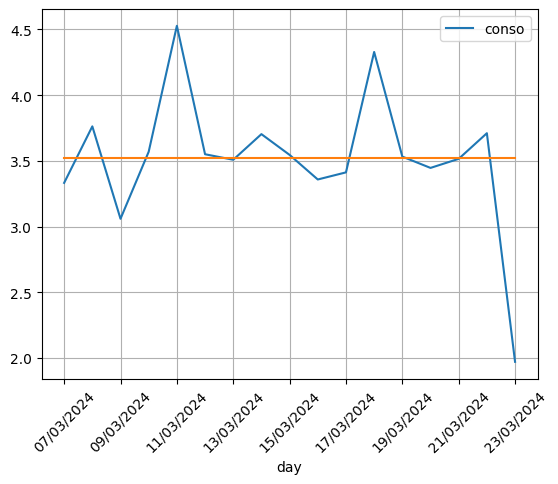

In [5987]:
conso_df.plot()
plt.plot()
plt.plot((0,len(conso_graph)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [5988]:
#manuel
#day = '19/03/2024'


In [5989]:
# conso day
conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

1971

In [5990]:
conso_day.head(1).dates, conso_day.tail(1).dates
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\1879875640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:25,33728,0.11,33.728,106.736243,1380771687,2024-03-23 00:00:25.121009,23/03/2024
0:0:57,32249,0.11,32.249,111.631368,1380803936,2024-03-23 00:00:57.370009,23/03/2024
0:1:30,32662,0.11,32.662,110.219827,1380836598,2024-03-23 00:01:30.032009,23/03/2024
0:2:3,33783,0.11,33.783,106.562472,1380870381,2024-03-23 00:02:03.815009,23/03/2024
0:2:37,33628,0.11,33.628,107.053646,1380904009,2024-03-23 00:02:37.443009,23/03/2024
...,...,...,...,...,...,...,...
13:23:27,26546,0.14,26.546,135.613652,1428954466,2024-03-23 13:23:27.900009,23/03/2024
13:23:54,26436,0.14,26.436,136.177939,1428980902,2024-03-23 13:23:54.336009,23/03/2024
13:24:20,25978,0.14,25.978,138.578797,1429006880,2024-03-23 13:24:20.314009,23/03/2024


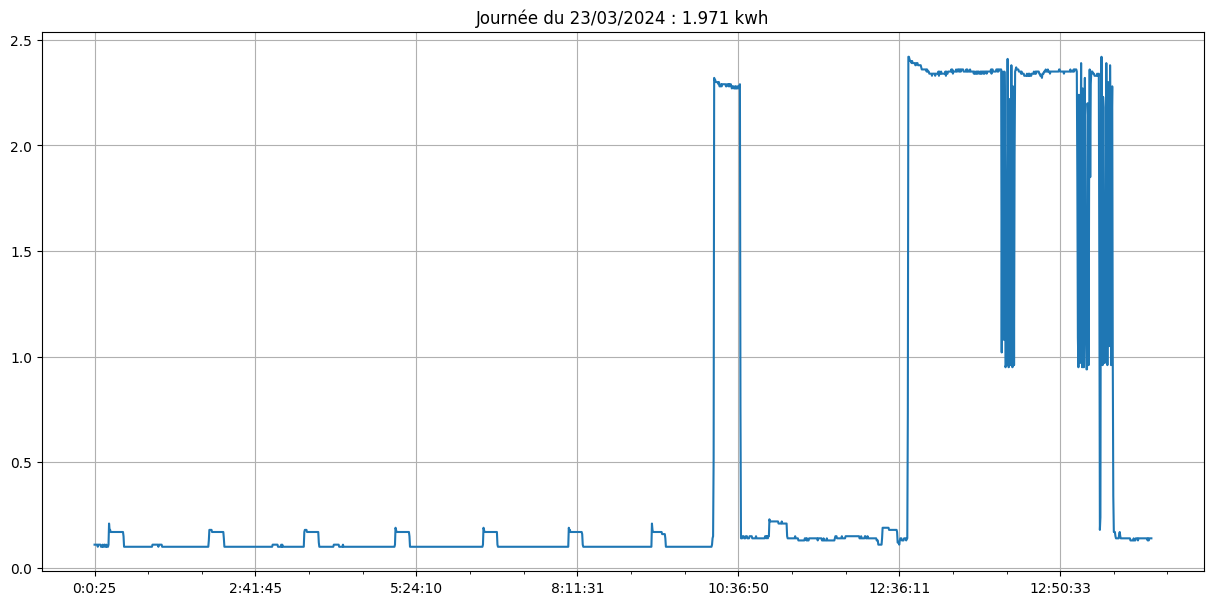

In [5991]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

432

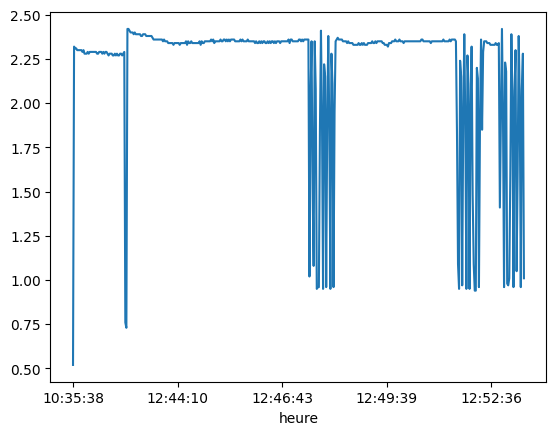

In [6037]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

638

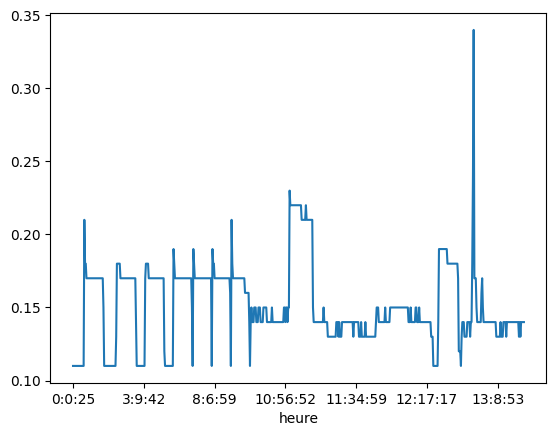

In [6038]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

1539

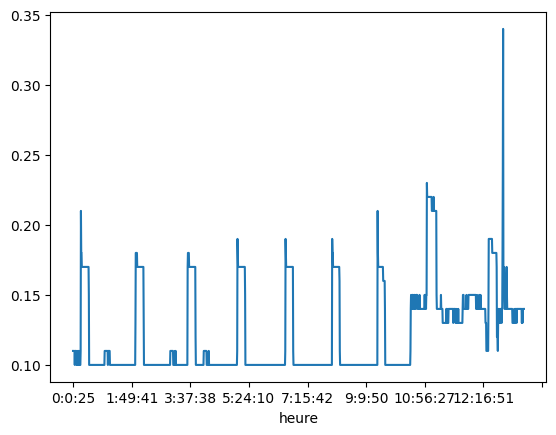

In [6039]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [5995]:
time = conso_data['dates']
time


0       2024-03-07 00:27:59.723009
1       2024-03-07 00:28:25.966009
2       2024-03-07 00:28:51.851009
3       2024-03-07 00:29:17.605009
4       2024-03-07 00:29:43.379009
                   ...            
59822   2024-03-23 13:23:27.900009
59823   2024-03-23 13:23:54.336009
59824   2024-03-23 13:24:20.314009
59825   2024-03-23 13:24:46.658009
59826   2024-03-23 13:25:13.225009
Name: dates, Length: 59827, dtype: datetime64[ns]

In [5996]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [5997]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [5998]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

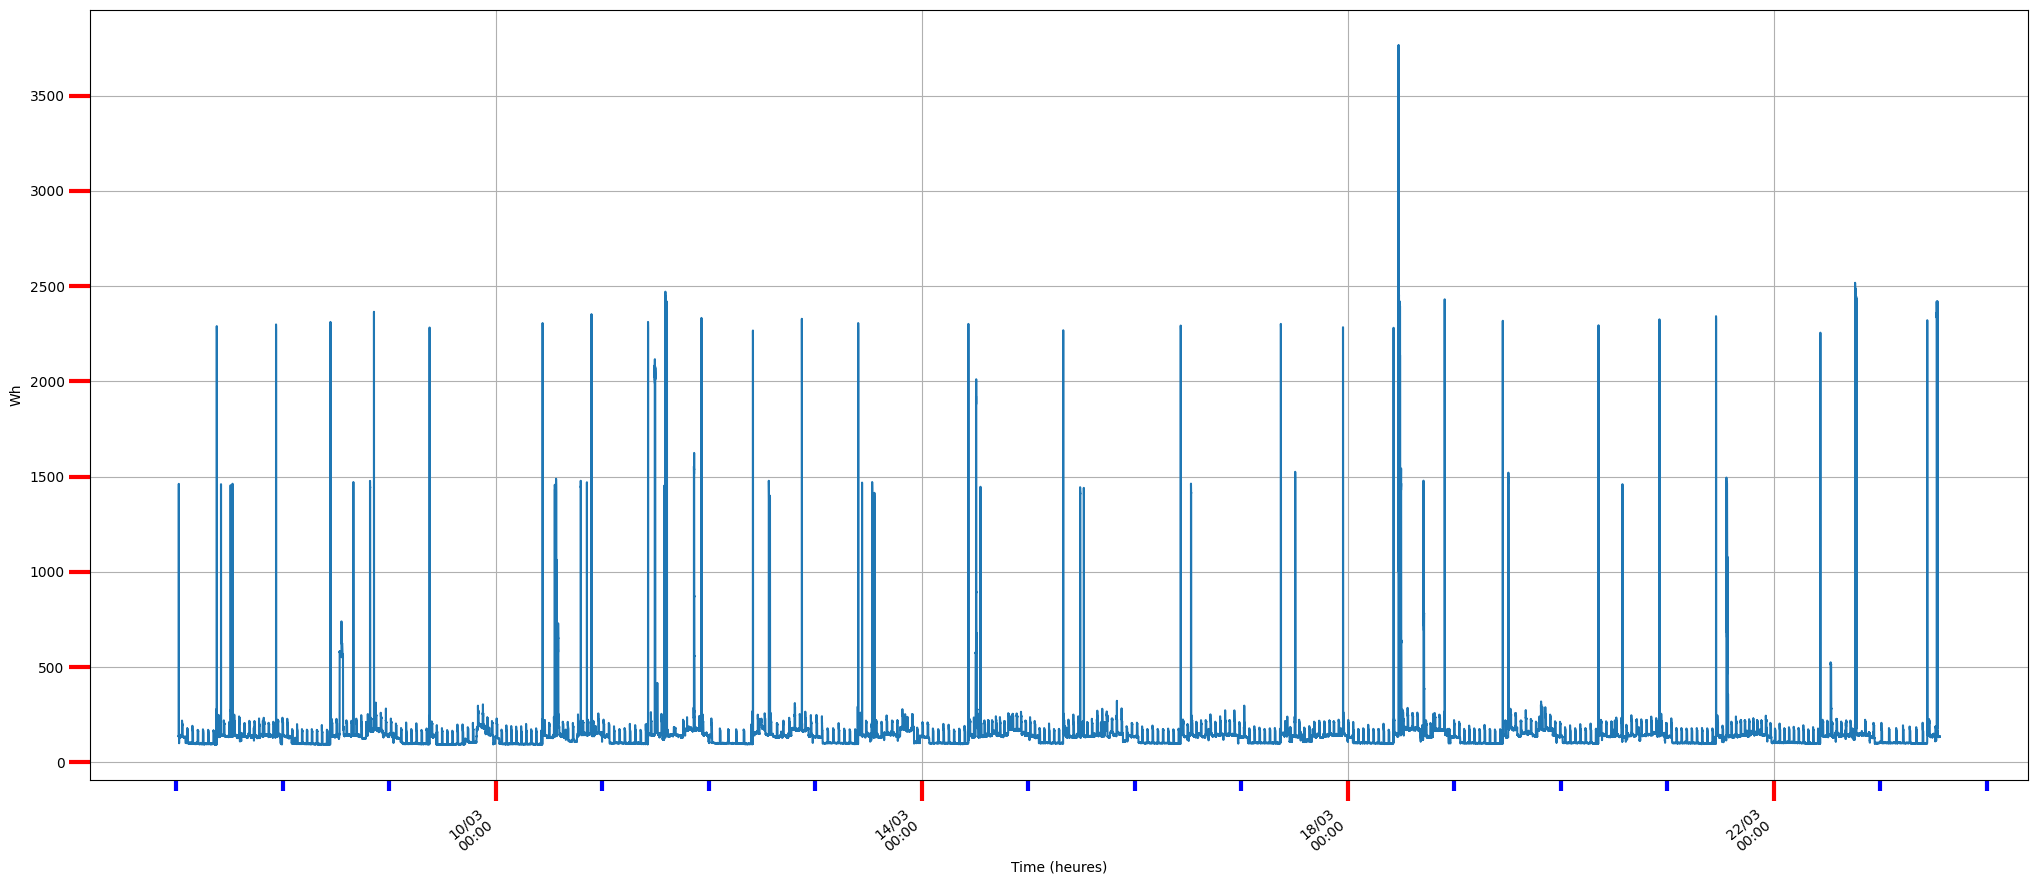

In [5999]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [6000]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
59826,26567,0.14,26.567,135.506455,1429059791,2024-03-23 13:25:13.225009,23/03/2024


In [6001]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1429059791000

# Slice of last 1 kWh

In [6002]:
l = len(conso_data)  # total watt consommés
l

59827

In [6003]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(59827, 1000)

In [6004]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [6005]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh   cumul(ms)  \
 58827     36941  0.10  36.941   97.452695  1412687949   
 58828     36866  0.10  36.866   97.650952  1412724815   
 58829     36909  0.10  36.909   97.537186  1412761724   
 58830     36966  0.10  36.966   97.386788  1412798690   
 58831     36844  0.10  36.844   97.709261  1412835534   
 ...         ...   ...     ...         ...         ...   
 59822     26546  0.14  26.546  135.613652  1428954466   
 59823     26436  0.14  26.436  136.177939  1428980902   
 59824     25978  0.14  25.978  138.578797  1429006880   
 59825     26344  0.14  26.344  136.653507  1429033224   
 59826     26567  0.14  26.567  135.506455  1429059791   
 
                            dates        days  
 58827 2024-03-23 08:52:21.383009  23/03/2024  
 58828 2024-03-23 08:52:58.249009  23/03/2024  
 58829 2024-03-23 08:53:35.158009  23/03/2024  
 58830 2024-03-23 08:54:12.124009  23/03/2024  
 58831 2024-03-23 08:54:48.968009  23/03/2024  
 ...   

In [6006]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [6007]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [6008]:
cumtime_end,cumtime_start

(1429059791000, 1412724815000)

In [6009]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

16334976000

In [6010]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 23, 13, 25, 18, 901463),
 datetime.datetime(2024, 3, 23, 8, 53, 3, 925463),
 '23/03/2024 13:25:13')

In [6011]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:27:59.723009,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:28:25.966009,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:28:51.851009,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:29:17.605009,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:29:43.379009,07/03/2024
...,...,...,...,...,...,...,...
59822,26546,0.14,26.546,135.613652,1428954466,2024-03-23 13:23:27.900009,23/03/2024
59823,26436,0.14,26.436,136.177939,1428980902,2024-03-23 13:23:54.336009,23/03/2024
59824,25978,0.14,25.978,138.578797,1429006880,2024-03-23 13:24:20.314009,23/03/2024
59825,26344,0.14,26.344,136.653507,1429033224,2024-03-23 13:24:46.658009,23/03/2024


In [6012]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('23/03/2024 08:52:58', '23/03/2024 13:25:13')

In [6013]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-23 08:52:21.383009', '2024-03-23 13:25:13.225009')

In [6014]:
k

1

In [6015]:
data.Interval.tail(1000)

58827    36941
58828    36866
58829    36909
58830    36966
58831    36844
         ...  
59822    26546
59823    26436
59824    25978
59825    26344
59826    26567
Name: Interval, Length: 1000, dtype: int64

In [6016]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(4.557995277777779, 5.265472765408622, 4, 33, 28)

In [6017]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [6018]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
58827,36941,0.10,36.941,97.452695,1412687949,2024-03-23 08:52:21.383009,23/03/2024,2024-03-23 08:52:21.383009
58828,36866,0.10,36.866,97.650952,1412724815,2024-03-23 08:52:58.249009,23/03/2024,2024-03-23 08:52:58.249009
58829,36909,0.10,36.909,97.537186,1412761724,2024-03-23 08:53:35.158009,23/03/2024,2024-03-23 08:53:35.158009
58830,36966,0.10,36.966,97.386788,1412798690,2024-03-23 08:54:12.124009,23/03/2024,2024-03-23 08:54:12.124009
58831,36844,0.10,36.844,97.709261,1412835534,2024-03-23 08:54:48.968009,23/03/2024,2024-03-23 08:54:48.968009
...,...,...,...,...,...,...,...,...
59822,26546,0.14,26.546,135.613652,1428954466,2024-03-23 13:23:27.900009,23/03/2024,2024-03-23 13:23:27.900009
59823,26436,0.14,26.436,136.177939,1428980902,2024-03-23 13:23:54.336009,23/03/2024,2024-03-23 13:23:54.336009
59824,25978,0.14,25.978,138.578797,1429006880,2024-03-23 13:24:20.314009,23/03/2024,2024-03-23 13:24:20.314009
59825,26344,0.14,26.344,136.653507,1429033224,2024-03-23 13:24:46.658009,23/03/2024,2024-03-23 13:24:46.658009


<Axes: >

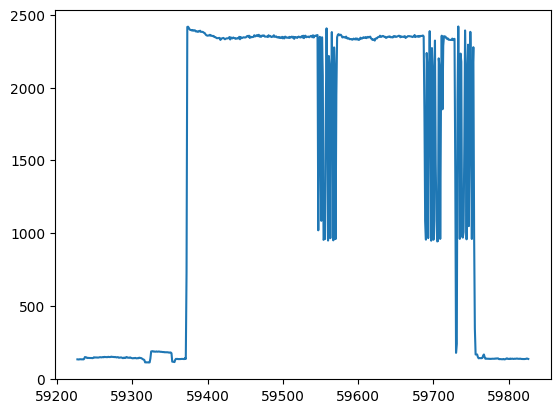

In [6019]:
data.tail(600)['Wh'].plot()

In [6020]:
data['Wh']

58827     97.452695
58828     97.650952
58829     97.537186
58830     97.386788
58831     97.709261
            ...    
59822    135.613652
59823    136.177939
59824    138.578797
59825    136.653507
59826    135.506455
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

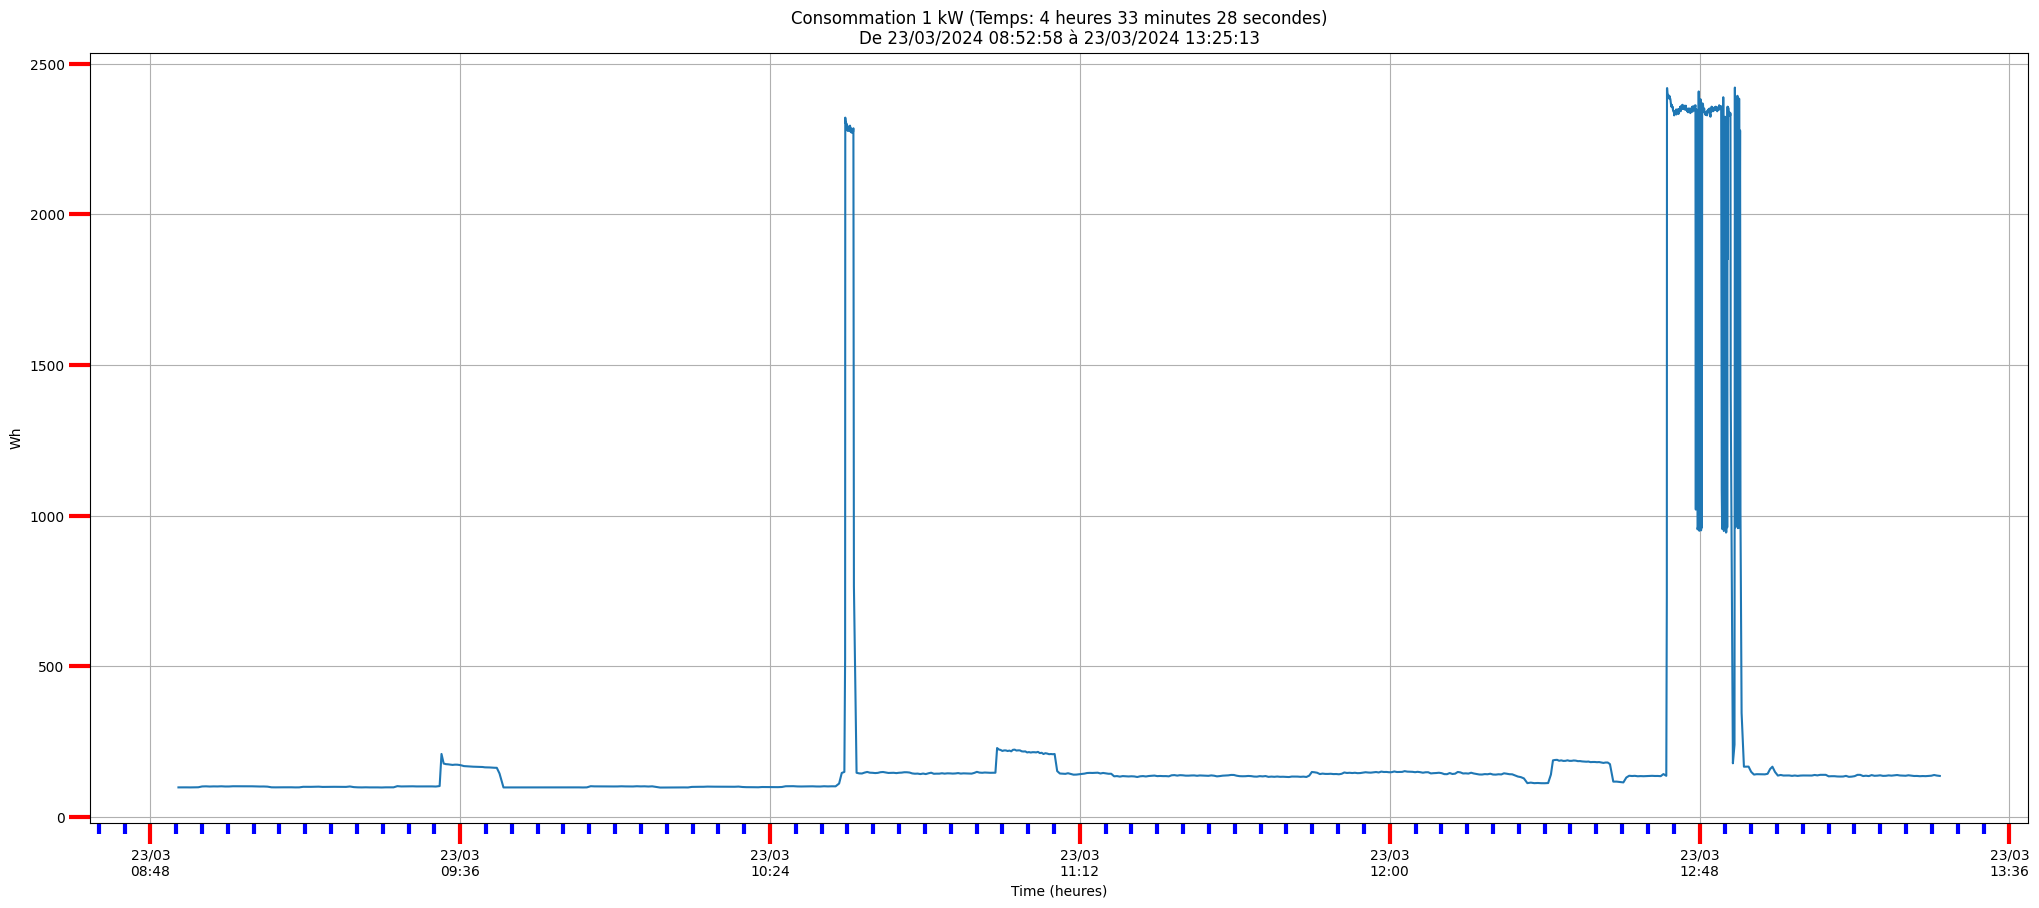

In [6021]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

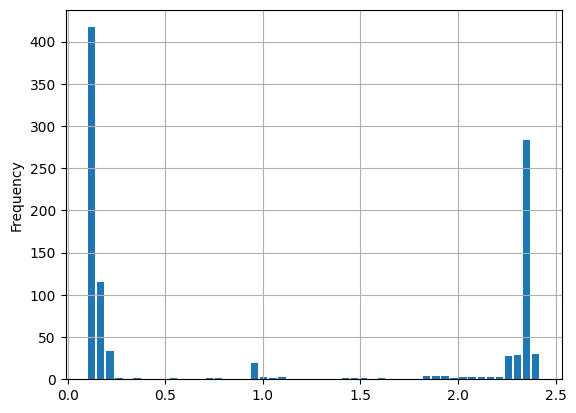

In [6022]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [6023]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
59822,26546,0.14,26.546,135.613652,1428954466,2024-03-23 13:23:27.900009,23/03/2024
59823,26436,0.14,26.436,136.177939,1428980902,2024-03-23 13:23:54.336009,23/03/2024
59824,25978,0.14,25.978,138.578797,1429006880,2024-03-23 13:24:20.314009,23/03/2024
59825,26344,0.14,26.344,136.653507,1429033224,2024-03-23 13:24:46.658009,23/03/2024
59826,26567,0.14,26.567,135.506455,1429059791,2024-03-23 13:25:13.225009,23/03/2024


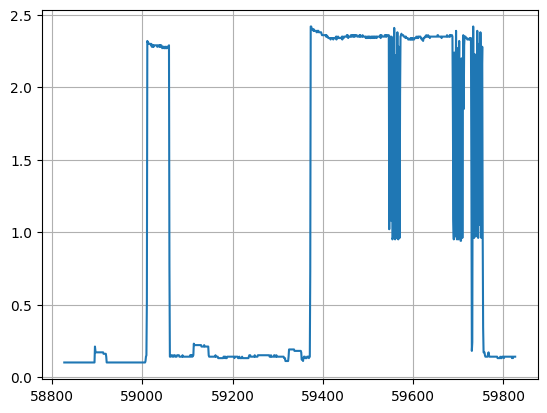

In [6024]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [6025]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(1429059791000.0, 23817.663183333334)

In [6026]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 23, 13, 25, 25, 157951),
 datetime.datetime(2024, 3, 7, 0, 27, 45, 366951))

In [6027]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(59827, 1429060, 396.9611111111111)

In [6028]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [6029]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [6030]:
732/12 # 60 jours

61.0

In [6031]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

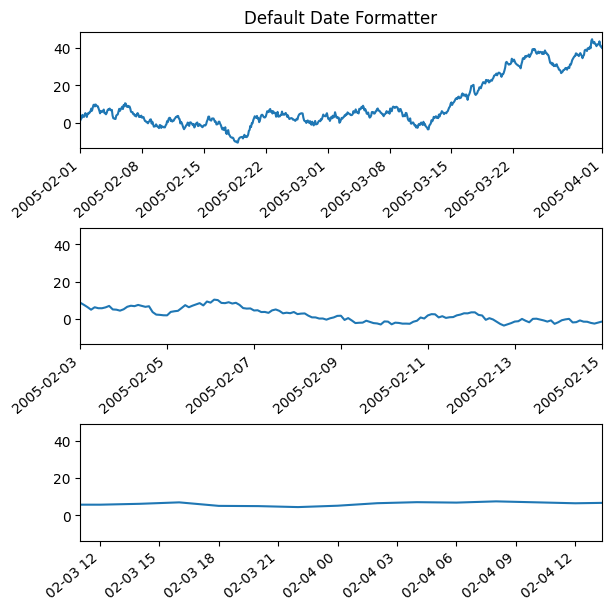

In [6032]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [6033]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)